# Part II - (Ford GoBike System Data)



# Investigation Overview


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The dataset has 183412 rows and 16 columns
 * duration_sec 
 * start_time  
 * end_time  
 * start_station_id  
 * start_station_name       
 * start_station_latitude  
 * start_station_longitude 
 * end_station_id  
 * end_station_name     
 * end_station_latitude  
 * end_station_longitude 
 * bike_id                  
 * user_type                
 * member_birth_year 
 * member_gender            
 * bike_share_for_all_trip 

 ### Objective
 The goal is to draw insights from this dataset using the variables at hand 

 ### Preliminary Data Wrangling
 Some of these preliminary data wrangling involved
 * Dropping all rows that have null values
 * Dropping columns start_station_id, start_station_latitude, start_station_longitude and the the coresponding end station columns 
 * Changed the datatypes of some columns like 
 1. bike_id (from int to string object)  
 2. member_gender, bike_share_for_all_trip and user_type (from string object to categorical datatype)

 ### During Analysis
 * I created a column for age group of the various users using their age 
  - Age groups 21 to 35 as Young Adult
  - 35 to 60 as Middle age adults
  - 60 to 80 as Senior adults




## Key Insights for Presentation

* The major trend and insight is that Senior Adults from the ages 60 upwards have higher average ride durations than any other age group , this could be as a result of having more time for biking as retirees or slow riding speed 

* The subscribers have significantly lower average ride durations than customers.




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import math
from numpy import mean

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\Ife\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df1 = df.dropna()


In [3]:
# Some Data wrangling to help with the drawing insights

# Dropping columns which are of no use to  me
df2 = df1[['duration_sec','start_time','end_time','start_station_name','end_station_name'
          ,'bike_id','user_type','member_birth_year','member_gender','bike_share_for_all_trip']]

df2['member_age'] = 2022-df2['member_birth_year']
df2 = df2.drop(columns=['member_birth_year'])

# Changing from string object to Datetime Datatype
# Start time
df2['start_time'] = pd.to_datetime(df2['start_time'])
# End time
df2['end_time'] = pd.to_datetime(df2['end_time'])

# To Categorical Datatype
df2['member_gender'] = pd.Categorical(df2['member_gender'])
df2['user_type'] = pd.Categorical(df2['user_type'])

# Removing outliers from the dataset using the member_age column
df3 = df2.query('member_age < 80')

# Age groups 21 to 35 as Young Adult, 35 to 60 as Middle age adults, 60 to 80 as Senior adults
age_range = [21,35,60,80]
age_range_name = ['young_adult', 'middle_age' , 'seniors']

# code to create the age range column 
df4 = df3.copy()
df4['age_range'] = pd.cut(df4['member_age'], bins=age_range, labels=age_range_name)

## The Distribution of Ride Duration in Seconds

 After rescaling (using the log scale due to the large value range of the variable) and cutting away outliers, The mode of the distribution of the ride durations in seconds fell between 400 seconds and 650 seconds.

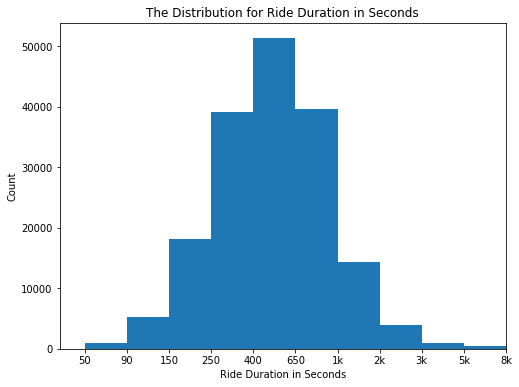

In [4]:
plt.figure(figsize=(8, 6))
bin_size = 0.5
bins = np.arange(4, np.log(df4['duration_sec']).max() + bin_size, bin_size )
plt.hist(np.log(df4['duration_sec']), bins= bins);

# Setting the x ticks values and labels
x_ticks = list(bins)
plt.xticks(x_ticks,[50,90,150,250,400,650,'1k','2k','3k','5k','8k','13k','22k','36k','60k','98k'])

#Setting the x and y label
plt.xlabel('Ride Duration in Seconds');
plt.ylabel('Count');
plt.title('The Distribution for Ride Duration in Seconds')

# Focus on the main part of the distribution and cutting out outliers
plt.xlim(3.7,9);

## Plotting Ride Duration against User Age

> After Rescaling duration in seconds and plottinng it against the ages of the users using a scatterplot , the range of ride durations decreased with increase in users age

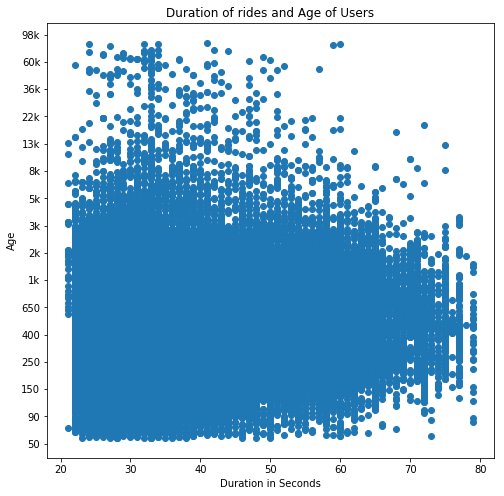

In [5]:
# Applying the log scale
plt.figure(figsize=[8,8])
plt.scatter(df4['member_age'], np.log(df4['duration_sec']));
# plt.yscale('log');

# Setting the x ticks values and labels
y_ticks = list(np.arange(4, np.log(df4['duration_sec']).max() + 0.5, 0.5 ))
plt.yticks(y_ticks,[50,90,150,250,400,650,'1k','2k','3k','5k','8k','13k','22k','36k','60k','98k']);

#Setting the x and y label
plt.xlabel('Duration in Seconds');
plt.ylabel('Age');

plt.title('Duration of rides and Age of Users');

## Age Group, User Gender and Average Ride Duration

> A boxplot to clarify and further butress that even though younger adults have more larger range of ride duration, the senior adults have higher average ride duration about the above relationship (this would feature in my explanatory analysis)


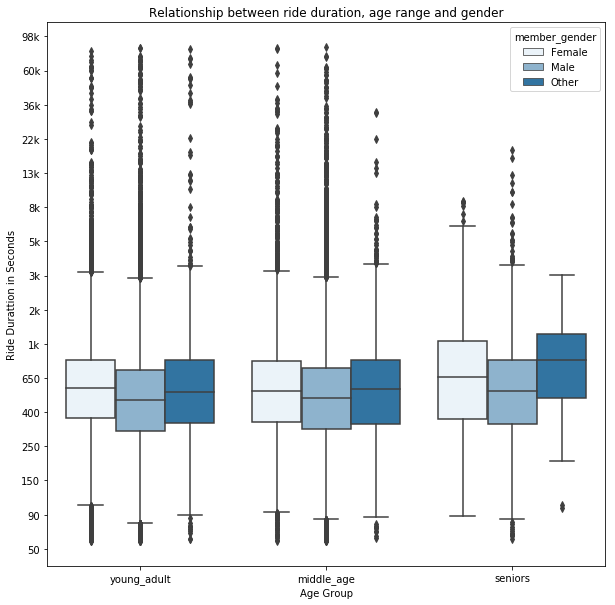

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,10])
sb.boxplot(x='age_range', y=np.log(df4['duration_sec']), hue = 'member_gender', data=df4, color=base_color)
# Setting the x ticks values and labels
y_ticks = list(np.arange(4, np.log(df4['duration_sec']).max() + 0.5, 0.5 ))
plt.yticks(y_ticks,[50,90,150,250,400,650,'1k','2k','3k','5k','8k','13k','22k','36k','60k','98k']);

#Setting the x and y label
plt.xlabel('Age Group');
plt.ylabel('Ride Durattion in Seconds');

plt.title('Relationship between ride duration, age range and gender');

## Average Ride Duration , User Type and Age Group

> A clustered bar chart to show the relationship between average ride duration, user type and age group enforcing that the trend is consistent in all the groups

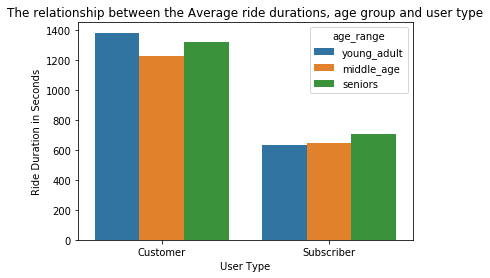

In [7]:
sb.barplot(x='user_type', y='duration_sec', hue='age_range', ci=None, data=df4);
plt.xlabel('User Type');
plt.ylabel('Ride Duration in Seconds')
plt.title('The relationship between the Average ride durations, age group and user type');

In [8]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --ServePostProcessor.port=8910 --post serve --no-input --no-prompt